In [1]:
import pandas as pd
import itertools
#%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
#import scikit_posthocs as sp

In [2]:
save_images = False
file = "results_cross.csv"
sep = ","
enc = "utf-8"

df = pd.read_csv(file, sep=sep, header=0, encoding=enc)

In [3]:
data_header = [
    "idx",
    "id", # integer that is mapped to the scene
    "name", # name of the scene
    "|V|", # nr of vertices
    "|T|", # nr of triangles
    "lambda", # regularization strength of cp
    "knn", # neighbourhood size which is considered in the CP
    "|S_P0|", # nr of superpoints in the mesh partition
    "|E_P0|" # nr of superedges in the mesh superpoint graph
]

data_header.extend([
    "|S_P1|", # nr of superpoints in the point cloud partition
    "|E_P1|" # nr of superedges in the point cloud superpoint graph
])
data_header.append("file_gt")# path to the ground truth mesh

posts = ["_P0", "_P1"]

for post in posts:
    data_header.append("max_ite" + post)
    data_header.append("n_ite" + post)
    data_header.append("exit_code" + post)

    data_header.append("s1" + post)
    data_header.append("s2" + post)
    data_header.append("s3" + post)
    data_header.append("s4" + post)
    data_header.append("s5" + post)

    data_header.append("e1_1" + post)
    data_header.append("e1_2" + post)
    data_header.append("e1_3" + post)
    data_header.append("e1_4" + post)
    data_header.append("e1_5" + post)

    data_header.append("e2_1" + post)
    data_header.append("e2_2" + post)
    data_header.append("e2_3" + post)
    data_header.append("e2_4" + post)
    data_header.append("e2_5" + post)

    data_header.append("|SSp1|" + post)
    data_header.append("|SSp2|" + post)
    data_header.append("|SSp3|" + post)
    data_header.append("|SSp4|" + post)
    data_header.append("|SSp5|" + post)

    data_header.append("|SR1|" + post)
    data_header.append("|SR2|" + post)
    data_header.append("|SR3|" + post)
    data_header.append("|SR4|" + post)
    data_header.append("|SR5|" + post)
    for feat in ["L", "P", "S", "V"]:
        data_header.append("mean({0}){1}".format(feat, post))
    for feat in ["L", "P", "S", "V"]:
        data_header.append("std({0}){1}".format(feat, post))
    for feat in ["L", "P", "S", "V"]:
        data_header.append("median({0}){1}".format(feat, post))
    data_header.append("mean(w){0}".format(post))
    data_header.append("std(w){0}".format(post))
    data_header.append("median(w){0}".format(post))
print(data_header)

['idx', 'id', 'name', '|V|', '|T|', 'lambda', 'knn', '|S_P0|', '|E_P0|', '|S_P1|', '|E_P1|', 'file_gt', 'max_ite_P0', 'n_ite_P0', 'exit_code_P0', 's1_P0', 's2_P0', 's3_P0', 's4_P0', 's5_P0', 'e1_1_P0', 'e1_2_P0', 'e1_3_P0', 'e1_4_P0', 'e1_5_P0', 'e2_1_P0', 'e2_2_P0', 'e2_3_P0', 'e2_4_P0', 'e2_5_P0', '|SSp1|_P0', '|SSp2|_P0', '|SSp3|_P0', '|SSp4|_P0', '|SSp5|_P0', '|SR1|_P0', '|SR2|_P0', '|SR3|_P0', '|SR4|_P0', '|SR5|_P0', 'mean(L)_P0', 'mean(P)_P0', 'mean(S)_P0', 'mean(V)_P0', 'std(L)_P0', 'std(P)_P0', 'std(S)_P0', 'std(V)_P0', 'median(L)_P0', 'median(P)_P0', 'median(S)_P0', 'median(V)_P0', 'mean(w)_P0', 'std(w)_P0', 'median(w)_P0', 'max_ite_P1', 'n_ite_P1', 'exit_code_P1', 's1_P1', 's2_P1', 's3_P1', 's4_P1', 's5_P1', 'e1_1_P1', 'e1_2_P1', 'e1_3_P1', 'e1_4_P1', 'e1_5_P1', 'e2_1_P1', 'e2_2_P1', 'e2_3_P1', 'e2_4_P1', 'e2_5_P1', '|SSp1|_P1', '|SSp2|_P1', '|SSp3|_P1', '|SSp4|_P1', '|SSp5|_P1', '|SR1|_P1', '|SR2|_P1', '|SR3|_P1', '|SR4|_P1', '|SR5|_P1', 'mean(L)_P1', 'mean(P)_P1', 'mean(S)_

In [4]:
#print(len(data_header))
#print(df.shape)
#print(df.iloc[1, :-8])
df = df.iloc[:, :-8]
df.columns = data_header
#df.columns = data_header
print(df)

    idx    id          name     |V|     |T|  lambda  knn  |S_P0|  |E_P0|  \
0     0   132  scene0061_01  177096  339094     0.1   30     836    7382   
1     1  1323  scene0621_00  250821  483813     0.1   30     616    5702   
2     2   782  scene0368_01   95679  173890     0.1   30    1018   10874   
3     3  1345  scene0630_03  134702  250353     0.1   30     512    4484   
4     4  1434  scene0673_02  272863  521057     0.1   30     704    6104   
..  ...   ...           ...     ...     ...     ...  ...     ...     ...   
76   76   215  scene0098_01  156148  299197     0.1   30     815    7606   
77   77  1298  scene0609_01  115550  217901     0.1   30     187    1470   
78   78   618  scene0289_00  116005  215882     0.1   30     643    6280   
79   79  1095  scene0516_01  289323  546573     0.1   30     937    8174   
80   80   182  scene0085_00  187883  363187     0.1   30     408    3372   

    |S_P1|  ...  std(P)_P1 std(S)_P1  std(V)_P1  median(L)_P1  median(P)_P1  \
0      1

In [5]:
knns = [30]
reg_strengths = [0.1]

cp_args = list(itertools.product(*[reg_strengths, knns]))
n_cp_args = len(cp_args)

stat_cols = ["|S_P0|", "|S_P1|", "|E_P0|", "|E_P1|"]

ite_vars = [
    "|SSp1|", "|SSp2|", "|SSp3|", "|SSp4|", "|SSp5|",
    "|SR1|", "|SR2|", "|SR3|", "|SR4|", "|SR5|"
   ]

for post in ["_P0", "_P1"]:
    for ite_var in ite_vars:
        stat_cols.append(ite_var + post)
    for feat in ["L", "P", "S", "V"]:
        stat_cols.append("mean({0}){1}".format(feat, post))
    for feat in ["L", "P", "S", "V"]:
        stat_cols.append("std({0}){1}".format(feat, post))
    for feat in ["L", "P", "S", "V"]:
        stat_cols.append("median({0}){1}".format(feat, post))
    stat_cols.append("mean(w){0}".format(post))
    stat_cols.append("std(w){0}".format(post))
    stat_cols.append("median(w){0}".format(post))

stats_list = n_cp_args * [None]

In [6]:
def diff(stat_df, col1, col2):
    d = stat_df.loc[:, col1] - stat_df.loc[:, col2]
    return d

for i in range(n_cp_args):
    reg_strength, knn = cp_args[i]
    tmp_df = df[(df["lambda"] == reg_strength) & (df["knn"] == knn)]
    
    #tmp_df = pd.merge(tmp_df, gt_df, how ="inner", on =["id"])
    
    print(np.min(tmp_df.loc[:, "n_ite_P0"]))
    print(np.min(tmp_df.loc[:, "n_ite_P1"]))
    
    stat_df = tmp_df.loc[:, stat_cols]    
    d1_M = diff(stat_df, "|SR1|_P0", "|SSp1|_P0")
    d2_M = diff(stat_df, "|SSp2|_P0", "|SR1|_P0")
    d3_M = diff(stat_df, "|SR2|_P0", "|SSp2|_P0")
    d4_M = diff(stat_df, "|SSp3|_P0", "|SR2|_P0")
    d5_M = diff(stat_df, "|SR3|_P0", "|SSp3|_P0")
    d6_M = diff(stat_df, "|SSp4|_P0", "|SR3|_P0")
    d7_M = diff(stat_df, "|SR5|_P0", "|SSp4|_P0")
    d8_M = diff(stat_df, "|SSp5|_P0", "|SR5|_P0")
    
    d1_P = diff(stat_df, "|SR1|_P1", "|SSp1|_P1")
    d2_P = diff(stat_df, "|SSp2|_P1", "|SR1|_P1")
    d3_P = diff(stat_df, "|SR2|_P1", "|SSp2|_P1")
    d4_P = diff(stat_df, "|SSp3|_P1", "|SR2|_P1")
    d5_P = diff(stat_df, "|SR3|_P1", "|SSp3|_P1")
    d6_P = diff(stat_df, "|SSp4|_P1", "|SR3|_P1")
    d7_P = diff(stat_df, "|SR5|_P1", "|SSp4|_P1")
    d8_P = diff(stat_df, "|SSp5|_P1", "|SR5|_P1")
    
    rf = pd.DataFrame(data=[
        d1_M, d2_M, d3_M, d4_M, d5_M, d6_M, d7_M, d8_M, 
        d1_P, d2_P, d3_P, d4_P, d5_P, d6_P, d7_P, d8_P
    ]).transpose()
    rf.columns = [
        "d_sp1r1_M", #1
        "d_r1sp2_M", #2
        "d_sp2r2_M", #3
        "d_r2sp3_M", #4
        "d_sp3r3_M", #5
        "d_r3sp4_M", #6
        "d_sp4r5_M", #7
        "d_r5sp5_M", #8
        "d_sp1r1_P", #1
        "d_r1sp2_P", #2
        "d_sp2r2_P", #3
        "d_r2sp3_P", #4
        "d_sp3r3_P", #5
        "d_r3sp4_P", #6
        "d_sp4r5_P", #7
        "d_r5sp5_P", #8
    ]
    
    stat_df_ = pd.concat([stat_df, rf], axis=1)
    
    mean_stat = stat_df_.mean(axis=0)
    std_stat = stat_df_.std(axis=0)
    median_stat = stat_df_.median(axis=0)
    
    stats = pd.concat([mean_stat, std_stat, median_stat], axis=1).transpose()
    #index_str = "_{0:.3f}_{1}".format(reg_strength, knn)
    #stats.index = ["mean" + index_str, "std" + index_str, "median" + index_str]
    stats.index = ["mean", "std", "median"]
    #print(stats["|SSp1|_M"] - stats["|SSp1|_P"])
    #print(stats["|SSp2|_M"] - stats["|SSp2|_P"])
    #print(stats["|SSp3|_M"] - stats["|SSp3|_P"])

    #print(stats["|SR1|_M"] - stats["|SR1|_P"])
    #print(stats["|SR2|_M"] - stats["|SR2|_P"])
    #print(stats["|SR3|_M"] - stats["|SR3|_P"])
    stats_t = ((reg_strength, knn), stats, stat_df_)
    stats_list[i] = stats_t

3
2


In [7]:
def plot_bar(x, df, ylabel, labels, title, miny=None, maxy=None, xticks=None):
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(8)
    plt.rc("font", size=20)
    
    ax = f.add_axes([0,0,1,1])
    if miny is not None and maxy is not None:
        ax.set(ylim=[miny, maxy])
    width = 0.225    
    d_ = np.array(x, copy=True)
    d_ = d_.astype(np.float32)
    for i in range(df.shape[1]):
        c = "blue"
        #plt.plot(x, y[:, i], "x", label=labels[i])
        #print(y[:, i])
        if i % 2 == 0:
            c = "orange"
        ax.bar(x=d_, height=df.iloc[0, i], width=width, color=c)
        d_ += width
    #plt.legend()
    ax.legend(labels=labels)
    if xticks is not None:
        plt.xticks(x, xticks, rotation="vertical")
    plt.title(title)
    plt.ylabel(ylabel)
    #plt.show()

In [20]:
def plot_df(cp_args, n_cp_args, stats_list, ex_cols, col_names, title=None, use_log=False, describe=False, print_latex=False, val_multiplier=1, ylabel=None, xlabel=None):
    df_all = None
    for i in range(n_cp_args):
        ex_cols_ = ex_cols.copy()
        col_names_ = col_names.copy()
        #if i == 1 or i == 3 or i == 5:
        #if i == 1 or i == 3:
        #    del ex_cols_[2]
        #    del col_names_[2]
        df = stats_list[i][2].loc[:, ex_cols_].copy()
        if use_log:
            df = np.log10(df)
        col = []
        for c in col_names_:
            col.append(c + r"$({0}, {1})$".format(cp_args[i][0], cp_args[i][1]))
        df.columns = col
        #print(col[-1], df)
        if df_all is None:
            df_all = df
        else:
            df_all = pd.concat([df_all, df], axis=0)
    #print(df_all)
    if describe:
        print(df_all.describe(include="all"))
    if print_latex:
        df_desc = df_all.describe(include="all")
        #print(df_desc)
        df_desc = df_desc.loc[["mean", "std", "25%", "50%", "75%"]]
        df_desc = df_desc * val_multiplier
        latex_str = df_desc.to_latex(escape=False, float_format="%.2f")
        print(latex_str)
    df_all.plot(kind="box", figsize=(12,8), rot=90, title=title, grid=True, showmeans=True, ylabel=ylabel, xlabel=xlabel)

In [11]:
df_desc = stats_list[0][2].describe(include="all")
print(df_desc.loc[["mean"]])

          |S_P0|      |S_P1|       |E_P0|       |E_P1|   |SSp1|_P0  \
mean  806.604938  125.703704  7360.864198  1490.419753  279.259259   

       |SSp2|_P0   |SSp3|_P0   |SSp4|_P0  |SSp5|_P0   |SR1|_P0  ...  \
mean  506.617284  743.358025  628.320988  30.888889  277.17284  ...   

       d_sp4r5_M  d_r5sp5_M  d_sp1r1_P  d_r1sp2_P  d_sp2r2_P  d_r2sp3_P  \
mean -599.765432   2.333333  -1.074074  47.814815  -6.753086  45.074074   

      d_sp3r3_P  d_r3sp4_P   d_sp4r5_P  d_r5sp5_P  
mean -13.938272   13.62963 -117.679012   0.555556  

[1 rows x 70 columns]


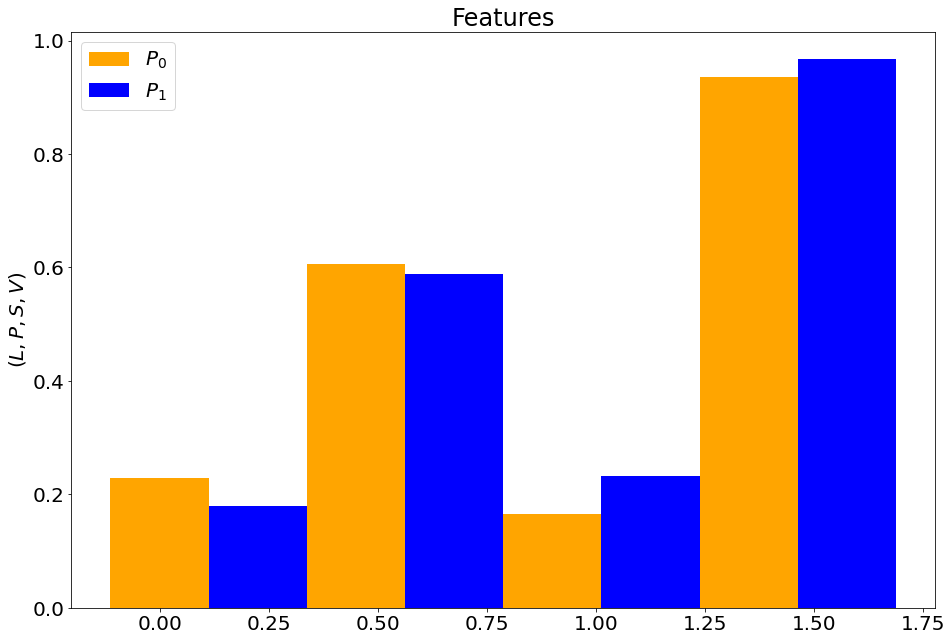

In [12]:
df_mean = df_desc.loc[["mean"],
                      [
                          "mean(L)_P0", "mean(L)_P1",
                          "mean(P)_P0", "mean(P)_P1",
                          "mean(S)_P0", "mean(S)_P1",
                          "mean(V)_P0", "mean(V)_P1"
                      ]
                     ]
x = np.arange(1, dtype=np.uint32)
plot_bar(x=x, df=df_mean, ylabel=r"$(L, P, S, V)$", labels=[r"$P_0$", r"$P_1$"], title=r"Features")
#plt.savefig("growth.png", bbox_inches="tight")

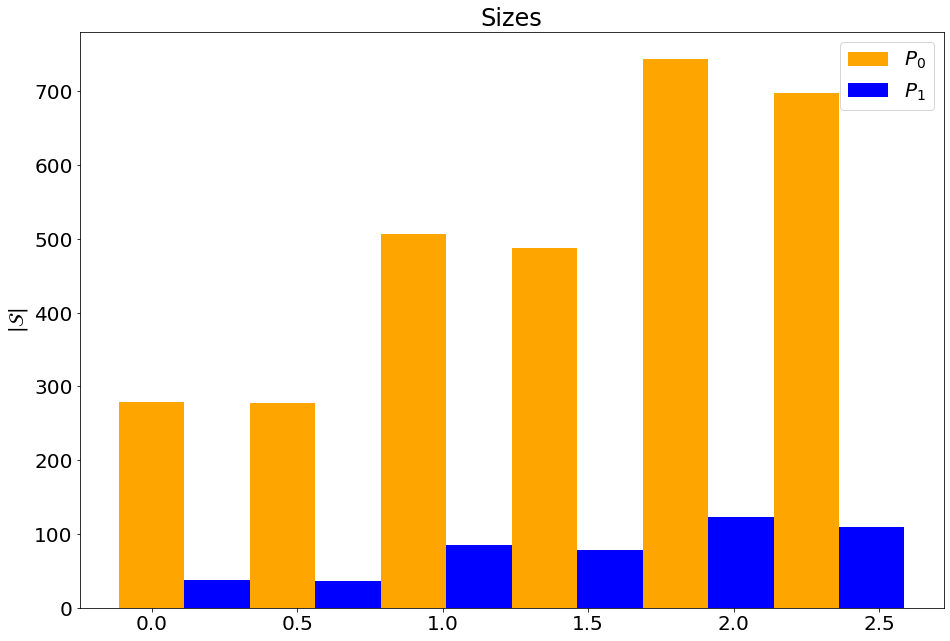

In [13]:
df_mean = df_desc.loc[["mean"],
                      [
                          "|SSp1|_P0", "|SSp1|_P1",
                          "|SR1|_P0", "|SR1|_P1",
                          "|SSp2|_P0", "|SSp2|_P1",
                          "|SR2|_P0", "|SR2|_P1",
                          "|SSp3|_P0", "|SSp3|_P1",
                          "|SR3|_P0", "|SR3|_P1"#,
                          #"|SSp4|_M", "|SSp4|_P",
                          #"|SR4|_M", "|SR4|_P",
                          #"|SSp5|_M", "|SSp5|_P",
                          #"|SR5|_M", "|SR5|_P",
                      ]
                     ]
x = np.arange(1, dtype=np.uint32)
plot_bar(x=x, df=df_mean, ylabel=r"$|\mathcal{S}|$", labels=[r"$P_0$", r"$P_1$"], title=r"Sizes")
#plt.savefig("growth.png", bbox_inches="tight")

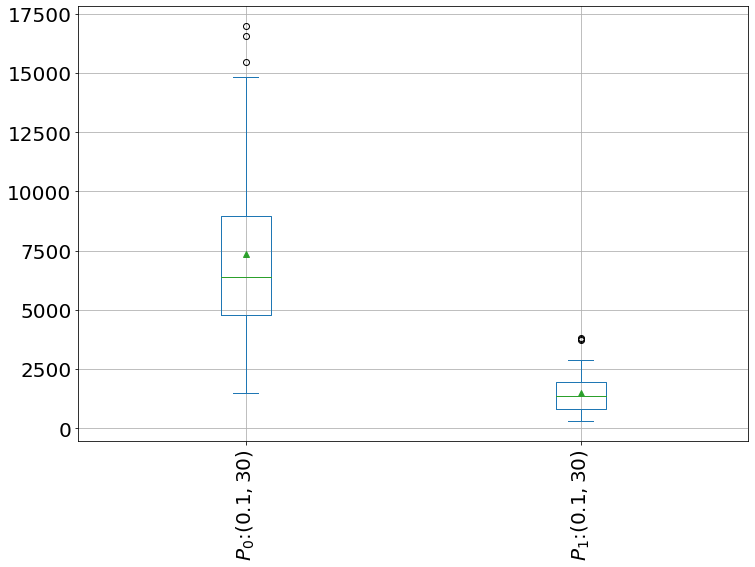

In [14]:
plot_df(cp_args=cp_args, n_cp_args=n_cp_args, stats_list=stats_list, 
        col_names=[r"$P_0$:", r"$P_1$:"],
       ex_cols=["|E_P0|", "|E_P1|"])
if save_images:
    plt.savefig("edges_P0P1.png", bbox_inches="tight")

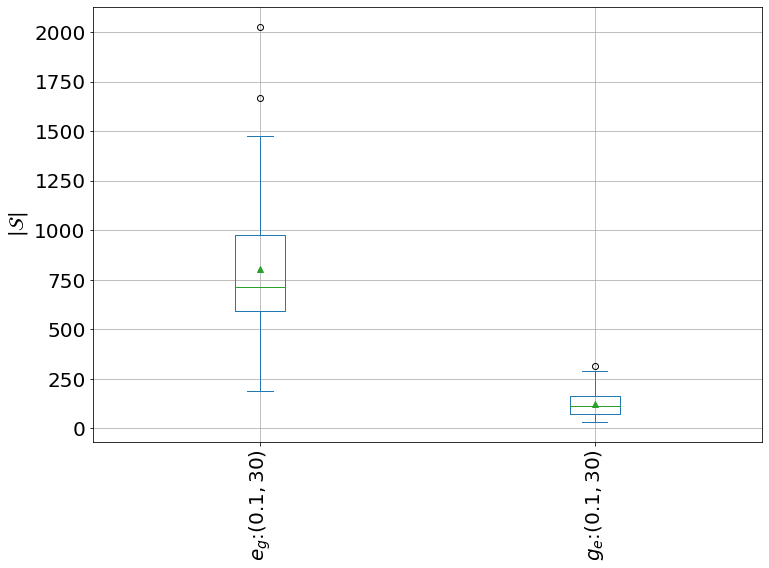

In [22]:
plot_df(cp_args=cp_args, n_cp_args=n_cp_args, stats_list=stats_list, 
        col_names=[r"$e_g$:", r"$g_e$:"],
       ex_cols=["|S_P0|", "|S_P1|"], ylabel=r"$|\mathcal{S}|$", xlabel="input graph")
if save_images:
    plt.savefig("sizes_cross_e_g.png", bbox_inches="tight")